# Recomendation System Submission - Steam Game Recomendation

##1. *Import Dataset*

Untuk proyek ini, digunakan dua dataset yang berbeda. Keduannya tersedia gratis di *Kaggle* dan data diekstrak dari *Steam*. *Dataset* diimport menggunakan *Kaggle API*. Dataset tersebut adalah *User Dataset* dan *Game Dataset*.

###a. *User Dataset*
*Dataset* yang pertama adalah *user dataset*. *Dataset* terdiri dari kolom:
- ***User*** : *user id* dalam format numerik,
- ***Game*** : Nama *game*,
- ***Purchase_play*** : Perilaku dari user terhadap game tersebut apakah *purchase* ketika *user* membenli *game* tersebut atau *play* ketika *user* memainkannya dan
- ***hrs*** : Jumlah nilai sesuai dengan perilaku. Jika perilaku *play* nilai ini merepresentasikan jumlah jam *game* tersebut dimainkan. Jika perilaku *purchase* nilai ini bernilai 1.

Setiap baris dari dataset mewakili perilaku pengguna terhadap sebuah game, baik '*play*' atau '*purchase*'. Jika perilakunya adalah '*play*', nilai yang terkait dengannya sesuai dengan jumlah jam bermain. Jika perilakunya adalah '*purchase*', nilai yang terkait dengannya adalah 1, yang berarti pengguna membeli game tersebut. Dalam kasus dataset pengguna ini, nilai yang terkait dengan '*purchase*' selalu 1.


*Link Dataset User* : [*user*](https://www.kaggle.com/datasets/tamber/steam-video-games)

###b. Game Dataset
*Dataset* kedua adalah *game dataset*. Terdiri dari:
- ***url :*** *link url* (mengarah langsung ke *Steam store*)
- ***types :*** Tipe dari paket game (*app, bundle, other*)
- ***name:*** Judul *Game*
- ***desc_snippet:*** Deskripsi singkat dari *game*
- ***recent reviews:*** Ulasan terbaru
- ***all reviews:*** Seluruh ulasan
- ***release date:*** Tanggal *game* dirilis
- ***developer:*** Pengembang *game* / pembuat *game*
- ***publisher:*** Perusahaan penerbit *game*
- ***popular tags:*** *Tag* yang populer pada *game* (*Gore, Action, Shooter, PvP, Other*)
- ***game detail:*** Informasi detail dari *game* (*Multi-player, Single-player, Full controller support, other*)
- ***languages:*** Bahasa yang didukung oleh *game*
- ***achievements:*** Pencapaian yang terdapat dalam *game*
- ***genre:*** Jenis *genre* dari *game* (*Action, Adventure, RPG, Strategy, other*)
- ***game description:*** Deskripsi lengkap dari *game*
- ***description of mature content:*** Deskripsi dari konten dewasa dalam *game*
- ***minimum requirement to run the game:*** Spesifikasi minimal untuk menjalankan *game*
- ***recommended requirement:*** Spesifikasi rekomendasi untuk menjalankan *game* dalam kondisi optimalnya
- ***original price:*** Harga game asli
- ***price with discount:*** Harga game setelah *discount*

Secara total terdapat 51920 *game* dalam dataset.



*Link dataset Game* : [*game*](https://www.kaggle.com/datasets/trolukovich/steam-games-complete-dataset)

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizki1994","key":"e2c181da4daa4a83ca5c75260be052ea"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d tamber/steam-video-games

  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 125MB/s]


In [6]:
!kaggle datasets download -d trolukovich/steam-games-complete-dataset

 69% 17.0M/24.6M [00:00<00:00, 77.5MB/s]
100% 24.6M/24.6M [00:00<00:00, 90.4MB/s]


In [7]:
import os
import zipfile
local_zip_1= '/content/steam-video-games.zip'
local_zip_2= '/content/steam-games-complete-dataset.zip'
zip_ref_1 = zipfile.ZipFile(local_zip_1, 'r')
zip_ref_2 = zipfile.ZipFile(local_zip_2, 'r')
zip_ref_1.extractall('/content')
zip_ref_2.extractall('/content')
zip_ref_1.close()
zip_ref_2.close()

##2. *Load Dataset*

###a. *User Dataset*

Sebagian dari *user dataset* ditampilkan dalam tabel di bawah ini. Perlu dicatat bahwa dataset asli tidak memiliki tajuk, dan yang ditampilkan dalam tabel di bawah ini ditambahkan untuk kenyamanan berdasarkan deskripsi data.

In [8]:
import pandas as pd

users = pd.read_csv('steam-200k.csv', header=None, names=['user', 'game', 'purchase_play', 'hrs', 'tmp'])
users.head(10)

,user,game,purchase_play,hrs,tmp
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
5,151603712,Spore,play,14.9,0
6,151603712,Fallout New Vegas,purchase,1.0,0
7,151603712,Fallout New Vegas,play,12.1,0
8,151603712,Left 4 Dead 2,purchase,1.0,0
9,151603712,Left 4 Dead 2,play,8.9,0


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user           200000 non-null  int64  
 1   game           200000 non-null  object 
 2   purchase_play  200000 non-null  object 
 3   hrs            200000 non-null  float64
 4   tmp            200000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [10]:
user_unique_value = users['user'].nunique()
game_unique_value = users['game'].nunique()

print("Total user unique value are ", user_unique_value)
print("Total game unique value are ", game_unique_value)

Total user unique value are  12393
Total game unique value are  5155


*User dataset* berisi total 200.000 baris, termasuk 5.155 game dan 12.393 pengguna . Demi kenyamanan, sruktur *dataset* diformat ulang dengan memisahkan informasi yang tersimpan dalam kolom 'perilaku' menjadi dua kolom: '*purchase*' dan '*play*'. Untuk setiap baris, kolom '*play*' memiliki nilai 1 jika pengguna benar-benar memainkan game atau 0 jika pengguna tidak memiliki catatan jam bermain.

In [11]:
users.describe()

,user,hrs,tmp
count,2.000000e+05,200000.000000,200000.0
mean,1.036559e+08,17.874384,0.0
std,7.208074e+07,138.056952,0.0
min,5.250000e+03,0.100000,0.0
25%,4.738420e+07,1.000000,0.0
50%,8.691201e+07,1.000000,0.0
75%,1.542309e+08,1.300000,0.0
max,3.099031e+08,11754.000000,0.0


Dari info statistik pada colomn *hrs*, nilai maksimalnya adalah 11.754 jam dengan nilai minimal 1 jam dan nilai rata-rata 17.87 jam.

Karena colomn *temp* hanya memiliki nilai 0, maka colomn ini akan di-*drop*

In [12]:
users.drop('tmp', inplace=True, axis=1)

In [13]:
users.head()

,user,game,purchase_play,hrs
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


Setiap baris dalam *user dataset* yang diformat ulang mewakili sebuah interaksi pengguna yang unik. Sebagian dari dataset pengguna yang diformat ulang ditampilkan dalam tabel di bawah ini.

In [14]:
users['purchase'] = users['purchase_play'] == 'purchase'
users['purchase'] = users['purchase'].astype(int)
users['play'] = users['purchase_play'] == 'play'
users['play'] = users['play'].astype(int)
users['hrs'] = users['hrs'] - users['purchase']
users = users.groupby(by=['user', 'game']).agg({'hrs': 'sum', 'purchase': 'sum', 'play': 'sum'}).reset_index()

In [15]:
users_filter = users[users['user'] == 151603712].sort_values(by='hrs', ascending=False)
users_filter.head(5)

,user,game,hrs,purchase,play
95364,151603712,The Elder Scrolls V Skyrim,273.0,1,1
95339,151603712,Fallout 4,87.0,1,1
95360,151603712,Spore,14.9,1,1
95340,151603712,Fallout New Vegas,12.1,1,1
95353,151603712,Left 4 Dead 2,8.9,1,1


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128804 entries, 0 to 128803
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      128804 non-null  int64  
 1   game      128804 non-null  object 
 2   hrs       128804 non-null  float64
 3   purchase  128804 non-null  int64  
 4   play      128804 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.9+ MB


Total data setelah diformat ulang adalah 128.804 data

In [17]:
users.describe()

,user,hrs,purchase,play
count,1.288040e+05,128804.000000,128804.000000,128804.000000
mean,1.025343e+08,26.748904,1.005489,0.547258
std,7.242875e+07,171.390189,0.073884,0.497951
min,5.250000e+03,0.000000,1.000000,0.000000
25%,4.559264e+07,0.000000,1.000000,0.000000
50%,8.605570e+07,0.300000,1.000000,1.000000
75%,1.542307e+08,5.700000,1.000000,1.000000
max,3.099031e+08,11754.000000,2.000000,2.000000


Informasi ststistik dari dataset setelah diformat ulang, untuk kolom *hrs* rata rata jam bermain adalah 26.75 jam dengan maksmilam jam bermain masih sama yaitu 11.754 jam

###b. *Game Dataset*

Dataset kedua adalah *game dataset*. IDataset ini berisi daftar *game*, deskripsinya, url (diarahkan ke toko *Steam*), jenis paket(*app, bundle*), judul *game*, deskripsi singkat, ulasan terbaru, semua ulasan, tanggal rilis, pengembang, penerbit, tag populer(*Gore, Action, Shooter, PvP…*), detail *game* (*Multi-player, Single-player, Full controller support…*), bahasa, pencapaian, genre (*Action, Adventure, RPG, Strategy…*), deskripsi *game*, deskripsi konten dewasa, persyaratan minimum untuk menjalankan *game*, persyaratan yang disarankan, harga asli dan harga dengan diskon.

In [18]:
game = pd.read_csv('steam_games.csv')
game.head(10)

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
5,https://store.steampowered.com/bundle/5699/Gra...,bundle,Grand Theft Auto V: Premium Online Edition,Grand Theft Auto V: Premium Online Edition bundle,NaN,NaN,NaN,Rockstar North,Rockstar Games,NaN,"Single-player,Multi-player,Downloadable Conten...","English, French, Italian, German, Spanish - Sp...",NaN,"Action,Adventure",NaN,NaN,NaN,NaN,NaN,$35.18
6,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645

In [19]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       40833 non-null  object 
 1   types                     40831 non-null  object 
 2   name                      40817 non-null  object 
 3   desc_snippet              27612 non-null  object 
 4   recent_reviews            2706 non-null   object 
 5   all_reviews               28470 non-null  object 
 6   release_date              37654 non-null  object 
 7   developer                 40490 non-null  object 
 8   publisher                 35733 non-null  object 
 9   popular_tags              37888 non-null  object 
 10  game_details              40313 non-null  object 
 11  languages                 40797 non-null  object 
 12  achievements              12194 non-null  float64
 13  genre                     40395 non-null  object 
 14  game_d

Terdapat 40.817 *game* dalam *dataset* ini. Jika melihat jumlah *non-null* , dapat disimpulkan *dataset* ini memiliki banyak *missing-values*.

##3. *Univariate Exploratory Data Analysis*

###a. *User  Dataset*

Untuk mengetahui apakah *game* yang paling banyak dibeli sesuai dengan *game* yang paling banyak dimainkan. Untuk setiap *game*, jumlah total pengguna dan total waktu *game* dimainkan oleh semua pengguna dihitung. Hasilnya ditampilkan pada tabel di bawah ini dalam urutan menurun berdasarkan jumlah pengguna. Tabel dibuat untuk 20 *game* teratas dengan pengguna terbanyak.

In [20]:
game_freq = users.groupby(by='game').agg({'user': 'count', 'hrs': 'sum'}).reset_index()
top20 = game_freq.sort_values(by='user',ascending=False)[:20].reset_index()
top20['hrs']=top20['hrs'].round(1)
top20

,index,game,user,hrs
0,1336,Dota 2,4841,981684.6
1,4257,Team Fortress 2,2323,173673.3
2,4788,Unturned,1563,16096.4
3,981,Counter-Strike Global Offensive,1412,322771.6
4,2074,Half-Life 2 Lost Coast,981,184.4
5,984,Counter-Strike Source,978,96075.5
6,2475,Left 4 Dead 2,951,33596.7
7,978,Counter-Strike,856,134261.1
8,4899,Warframe,847,27074.6
9,2071,Half-Life 2 Deathmatch,823,3712.9


Dari tabel di atas, untuk beberapa *game*, ada hubungan antara yang paling banyak dimainkan dan yang paling banyak dibeli. Sebagai contoh, '*Dota 2*' tidak dapat disangkal lagi merupakan *game* yang paling populer, memiliki jumlah pengguna terbanyak dan total jam bermain terbanyak. Namun, hal ini tidak selalu terjadi, contoh yang menarik adalah '*Half-Life 2 Lost Coast*' yang memiliki jumlah pengguna yang tinggi (981 pengguna), tetapi total jam bermainnya cukup rendah (184,4 jam). Penjelasan yang mungkin untuk hal ini adalah karena game ini dibeli sebagai bagian dari bundel game.

Untuk memvisualisasikan hasil yang ditampilkan pada tabel di atas dengan lebih baik, *plot histogram* digunakan. Judul *game* diurutkan dalam urutan menurun berdasarkan jumlah pengguna. Gradien warna menunjukkan total jam bermain, dari yang paling banyak dimainkan hingga yang paling sedikit dimainkan.

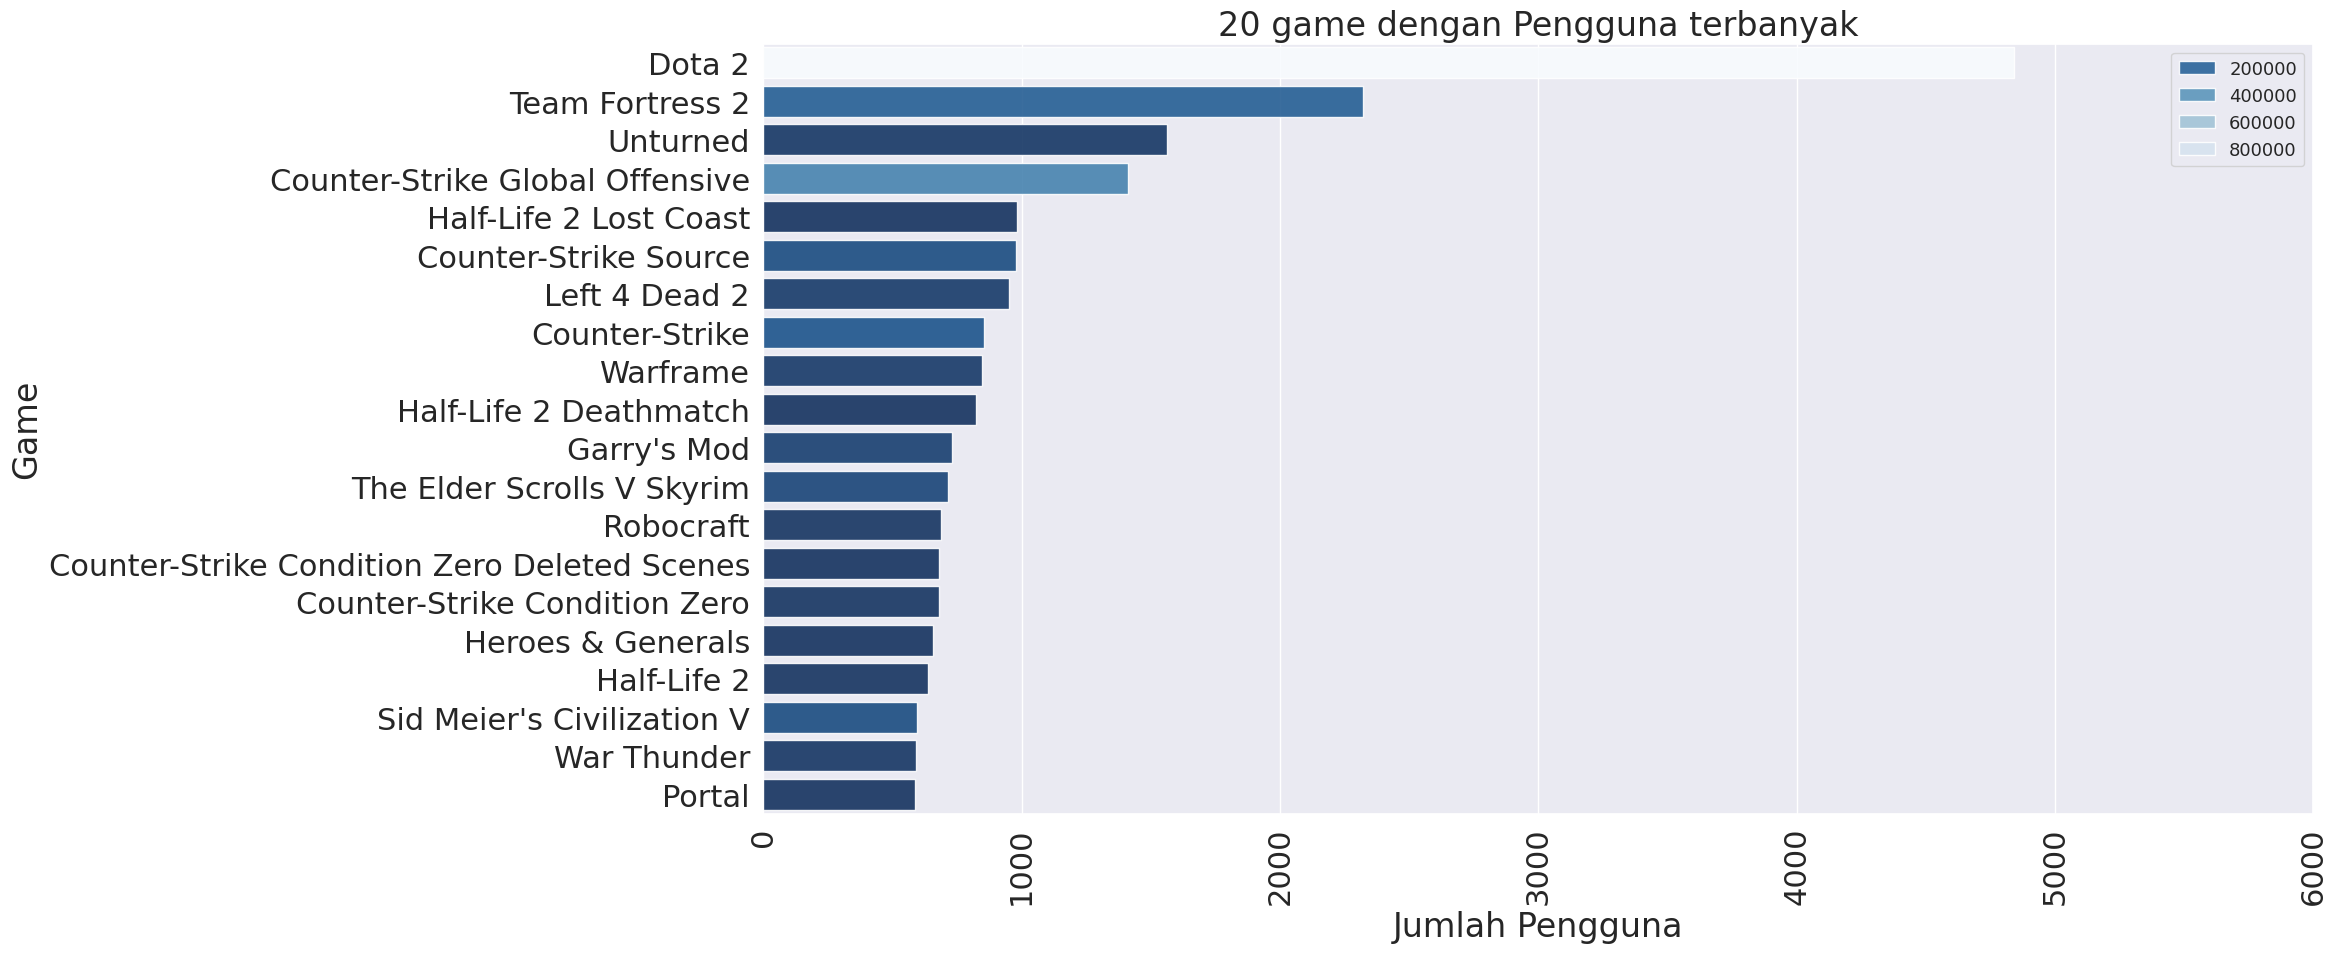

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.set(font_scale = 2)
ax = sns.barplot(x='user', y='game', hue='hrs',alpha=0.9,data=top20, palette='Blues_r',dodge=False)
ax.set(xlabel='Jumlah Pengguna', ylabel='Game', title='20 game dengan Pengguna terbanyak')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(fontsize=13)

plt.savefig('histogram_game with most users.png')
plt.show()

Untuk beberapa kasus, tidak ada hubungan antara jumlah total pengguna dan total jam yang dimainkan, yang berarti bahwa jumlah pengguna yang tinggi tidak merepresentasikan jumlah jam yang tinggi pula.

Jenis plot yang sama dibuat ulang, tetapi kali ini hanya mempertimbangkan pengguna yang benar-benar memainkan *game*. Jadi, untuk setiap game, pengguna yang membelinya tetapi tidak pernah memainkannya dihapus.

<ipython-input-22-80091f7bd5ea>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


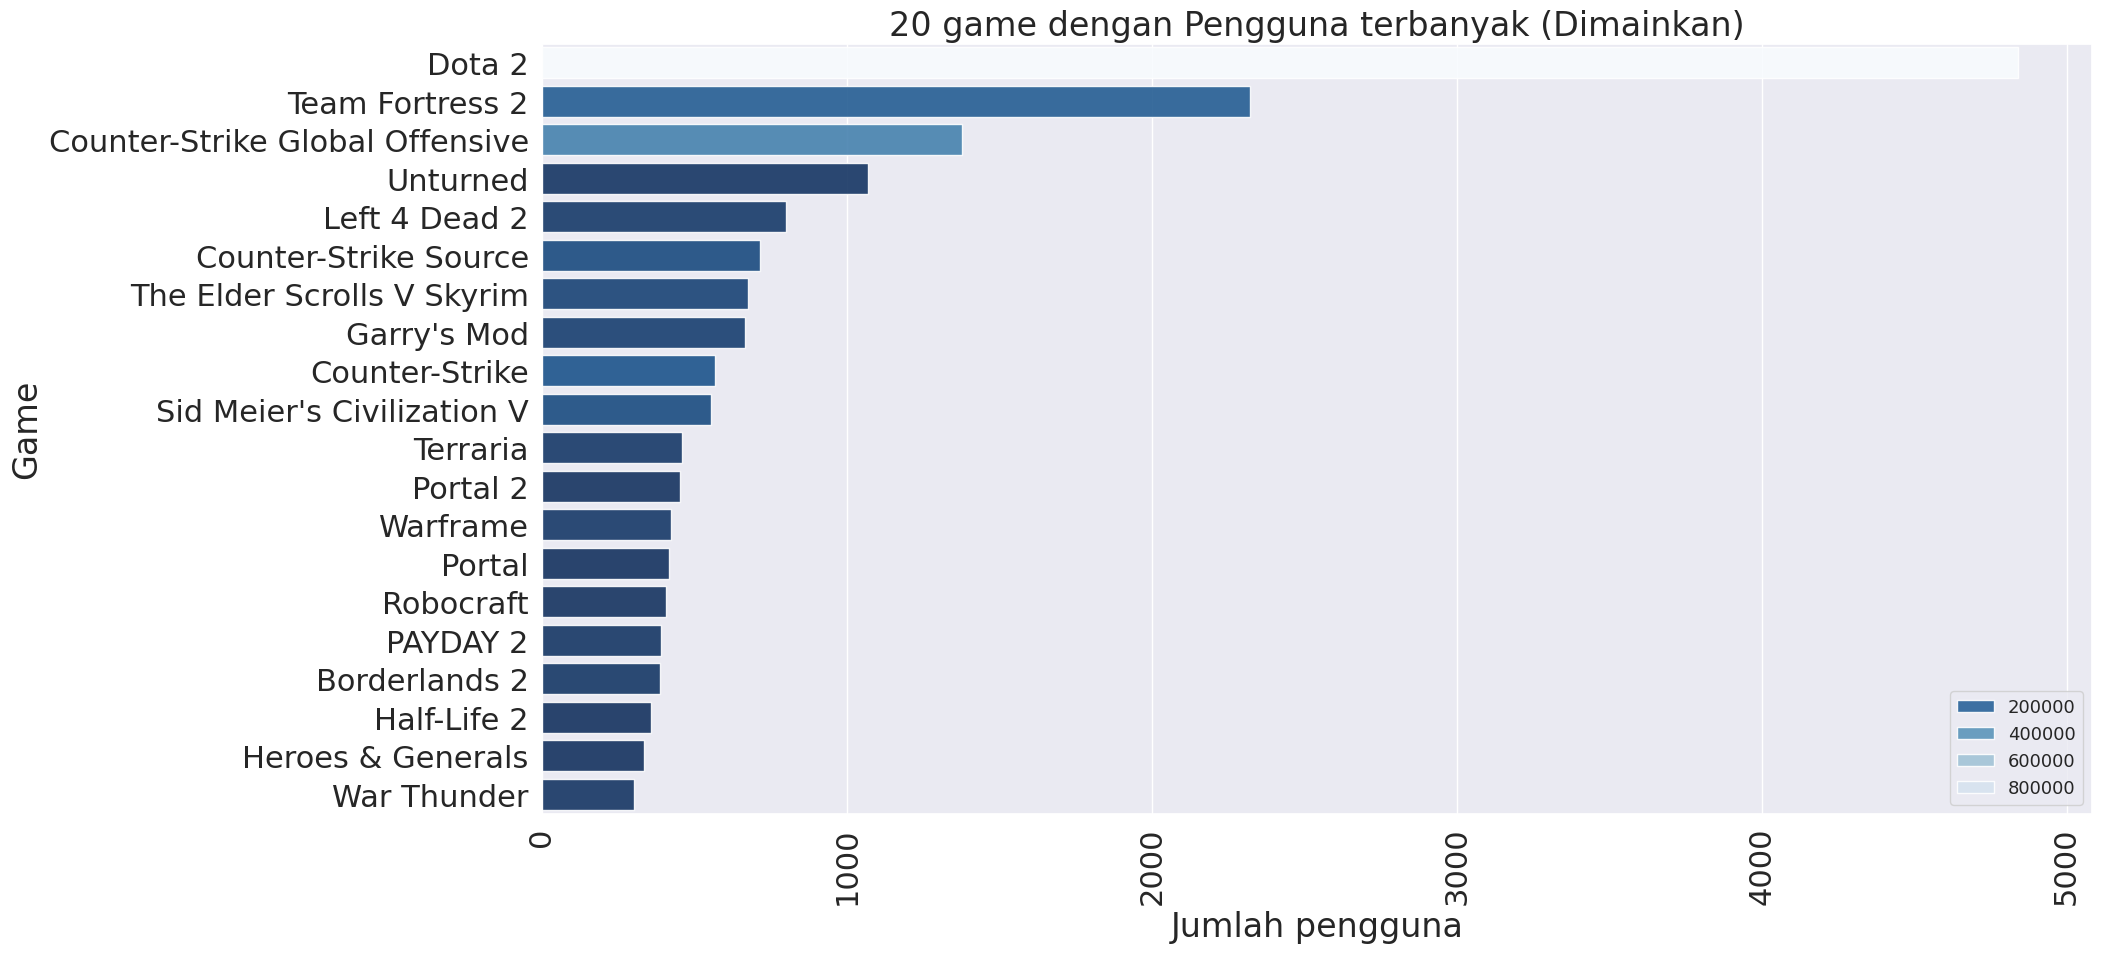

In [22]:
index=users[users['play']==0].index
users.drop(index,inplace=True)
game_total_hrs = users.groupby(by='game')['hrs'].sum()
most_played_games = game_total_hrs.sort_values(ascending=False)[:20]

# Game dengan jumlah pengguna terbanyak
game_freq = users.groupby(by='game').agg({'user': 'count', 'hrs': 'sum'}).reset_index()
top20 = game_freq.sort_values(by='user',ascending=False)[:20].reset_index()
top20['hrs']=top20['hrs'].round(1)

plt.figure(figsize=(20, 10))
sns.set(font_scale = 2)
ax = sns.barplot(x='user', y='game', hue='hrs',alpha=0.9,data=top20, palette='Blues_r',dodge=False)
ax.set(xlabel='Jumlah pengguna', ylabel='Game', title='20 game dengan Pengguna terbanyak (Dimainkan)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(fontsize=13)

plt.savefig('histogram_game with most users(play).png')
plt.show()

Ketika membandingkan plot baru ini dengan plot sebelumnya, beberapa *game* jatuh dari 20 *game*teratas berdasarkan jumlah pengguna. Sebagai contoh '*Counter-Strike Condition Zero*', yang berada di posisi 15 teratas dalam plot dengan mempertimbangkan semua pengguna yang membeli *game* tersebut, tidak muncul di 20 *game* teratas dengan mempertimbangkan hanya pengguna yang benar-benar memainkan *game* tersebut. Contoh yang berlawanan adalah '*Terraria*' yang muncul di plot kedua sebagai 11 teratas sementara tidak terdaftar di plot pertama. Seperti yang telah disebutkan sebelumnya, penjelasan yang mungkin untuk perbedaan ini adalah beberapa *game* dibeli sebagai bagian dari bundel *game*.


###b. *Game Dataset*

Untuk memahami lebih baik bagaimana ulasan *game* didistribusikan, jumlah *game* dengan persentase ulasan positif masing-masing diplot.



In [23]:
import re
import pathlib

# menambah dan menginisialisasi kolom baru
game["review_qualification"] = ""
game["percentage_positive_review"] = -1

for i, row in game.iterrows():
    if type(row["all_reviews"]) == str:

        # ekstrak % dari ulasan positif
        x = re.findall(r'- [0,1,2,3,4,5,6,7,8,9]*%', row["all_reviews"])
        if len(x) != 0:
            game.at[i, 'percentage_positive_review'] = x[0].translate({ord(i): None for i in '- %'})

        # ekstrak kualifikasi ulasan
        reviewParse = row["all_reviews"].split(",")
        if 'user reviews' in reviewParse[0]:
            game.at[i, 'review_qualification'] = ""
        else:
            game.at[i, 'review_qualification'] = reviewParse[0]

# Daftar dari kemungkinan kualifikasi ulasan
possibleReview =game["review_qualification"].unique()
print(possibleReview)


# Cetak csv ulasan
game.to_csv(pathlib.Path(r'/content/steam_games_reviews.csv'),
                 columns=["name", "percentage_positive_review", "review_qualification", "all_reviews"],
                 index=False)

['Very Positive' 'Mixed' 'Mostly Positive' '' 'Overwhelmingly Positive'
 'Positive' 'Mostly Negative' 'Negative' 'Very Negative'
 'Overwhelmingly Negative']


In [24]:
reviews = pd.read_csv("steam_games_reviews.csv")
reviews

,name,percentage_positive_review,review_qualification,all_reviews
0,DOOM,92,Very Positive,"Very Positive,(42,550),- 92% of the 42,550 use..."
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,Mixed,"Mixed,(836,608),- 49% of the 836,608 user revi..."
2,BATTLETECH,71,Mostly Positive,"Mostly Positive,(7,030),- 71% of the 7,030 use..."
3,DayZ,61,Mixed,"Mixed,(167,115),- 61% of the 167,115 user revi..."
4,EVE Online,74,Mostly Positive,"Mostly Positive,(11,481),- 74% of the 11,481 u..."
...,...,...,...,...
40828,Rocksmith® 2014 Edition – Remastered – Sabaton...,-1,NaN,NaN
40829,Rocksmith® 2014 Edition – Remastered – Stone T...,-1,NaN,NaN
40830,Fantasy Grounds - Quests of Doom 4: A Midnight...,-1,NaN,NaN
40831,Mega Man X5 Sound Collection,-1,NaN,NaN


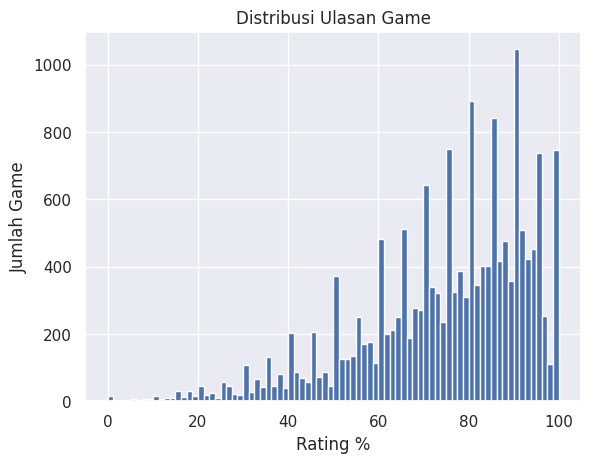

In [25]:
dataReviews = pd.read_csv("steam_games_reviews.csv", usecols=["name", "percentage_positive_review"],)
sns.set(font_scale = 1)
plt.hist(x=dataReviews["percentage_positive_review"], range=[0, 100], bins=80)

# Tambah judul dan nama axis
plt.title('Distribusi Ulasan Game')
plt.ylabel('Jumlah Game')
plt.xlabel('Rating %')

plt.savefig('Distribution of Game Reviews.png')
plt.show()

Dari plot distribusi diatas terlihat jelas bahwa nilai ulasan untuk *game* dalam *game dataset* terkonsentrasi pada nilai rating 60-100%.

Hal ini mengindikasikan bahwa kebanyakan *game* mendapatkan ulasan yang cukup baik dari pengguna.


Plot di bawah ini mencantumkan semua genre game yang tersedia di dataset game dengan jumlah game masing-masing.

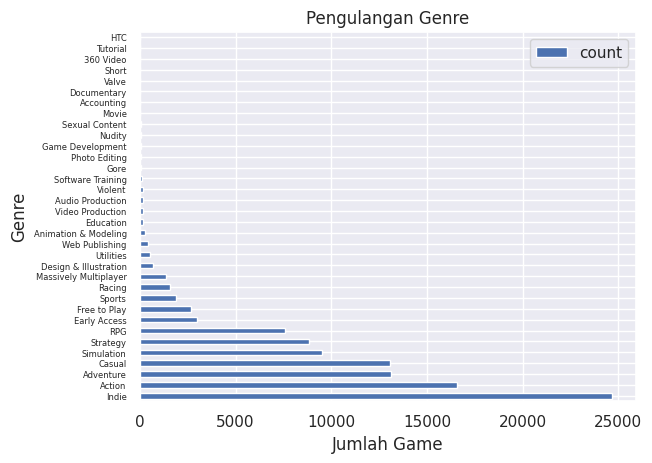

In [26]:
x = []

for i, row in game.iterrows():
    if type(row["genre"]) is str:
        x = x + row["genre"].split(',')

uniqueGenre = list(set(x))

df = pd.DataFrame(columns=["genre", "count"])
for genre in uniqueGenre:
    df2 = pd.DataFrame(data=[[genre, x.count(genre)]], columns=["genre", "count"])
    df = pd.concat([df, df2], ignore_index=True)

df = df.sort_values(by="count", ascending=False)

ax = df.plot.barh(x='genre', y='count')

# Tanbah judul dan nama axis
plt.title('Pengulangan Genre')
plt.xlabel('Jumlah Game')
plt.ylabel('Genre')
plt.yticks(fontsize=6)


plt.savefig('Recurrence of Genre.png')
plt.show()

Berdasarkan plot diatas, 5 genre terbanyak dalam *dataset* adalah *Indie, Action, Adventure, Casual,* dan *Simulation*. Hal ini mengindikasikan *game Action, Adventure* masih menjadi primadona dimata para pecinta *game* pada *Steam Store*

Plot serupa dibuat, menunjukkan 20 tag game terpopuler yang tersedia di dataset game dengan jumlah game masing-masing.

      popular_tags  count
271          Indie  23718
373         Action  16112
42       Adventure  13378
168         Casual  12969
147     Simulation   9273
..             ...    ...
9    Asymmetric VR      3
205            BMX      3
184           Snow      3
20             ATV      3
115         Skiing      2

[376 rows x 2 columns]


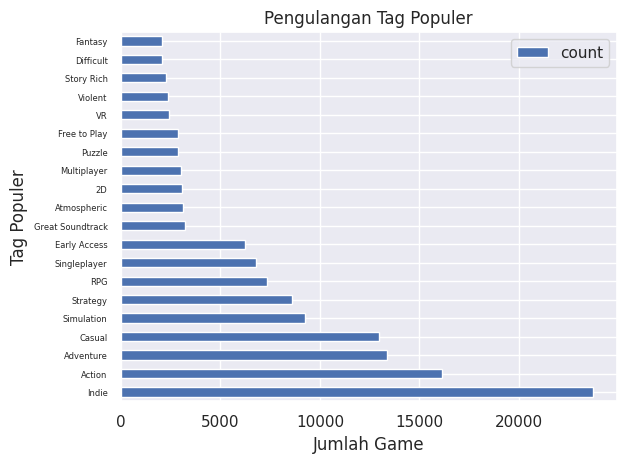

In [27]:
x = []

for i, row in game.iterrows():
    if type(row["popular_tags"]) is str:
        x = x + row["popular_tags"].split(',')

uniqueGenre = list(set(x))

df = pd.DataFrame(columns=["popular_tags", "count"])
for genre in uniqueGenre:
    df2 = pd.DataFrame(data=[[genre, x.count(genre)]], columns=["popular_tags", "count"])
    df = pd.concat([df, df2], ignore_index=True)

df = df.sort_values(by="count", ascending=False)
print(df)
df = df.head(20)

ax = df.plot.barh(x='popular_tags', y='count')

# Tanbah judul dan nama axis
plt.title('Pengulangan Tag Populer')
plt.xlabel('Jumlah Game')
plt.ylabel('Tag Populer')
plt.yticks(fontsize=6)

plt.savefig('Recurrence of Popular Tags.png')
plt.show()

Terakhir, plot berikut ini menunjukkan 20 detail *game* yang paling sering muncul di *dataset game* dengan jumlah *game* yang terkait dengan masing-masing detail *game*.

Hasil yang ditunjukkan pada plot *popular tag* serupa dengan hasil pada plot *genre*. Dimana hasil 5 *popular tag* adalah *Indie, Action, Adventure, Casual, dan Simulation*

##4. *Data Preprocessing*

Untuk membangun sistem rekomendasi, data perlu disiapkan dan membangun algoritmanya. Untuk melakukannya, pertama-tama perlu dilakukan praproses pada dataset game.

###a. Pilih informasi yang berguna
Untuk menyiapkan data untuk rekomendasi berbasis konten, langkah pertama adalah memilih informasi yang paling berguna untuk menemukan game yang serupa. Kolom-kolom yang berguna dari dataset game dengan menggunakan kode berikut.

In [28]:
select_game = game.loc[:, ["name", "genre", "game_details", "popular_tags"]]
select_game.head()

,name,genre,game_details,popular_tags
0,DOOM,Action,"Single-player,Multi-player,Co-op,Steam Achieve...","FPS,Gore,Action,Demons,Shooter,First-Person,Gr..."
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Action,Adventure,Massively Multiplayer","Multi-player,Online Multi-Player,Stats","Survival,Shooter,Multiplayer,Battle Royale,PvP..."
2,BATTLETECH,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S..."
3,DayZ,"Action,Adventure,Massively Multiplayer","Multi-player,Online Multi-Player,Steam Worksho...","Survival,Zombies,Open World,Multiplayer,PvP,Ma..."
4,EVE Online,"Action,Free to Play,Massively Multiplayer,RPG,...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO..."


In [29]:
select_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          40817 non-null  object
 1   genre         40395 non-null  object
 2   game_details  40313 non-null  object
 3   popular_tags  37888 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


There are 40.833 entries in select_game

##b. *Missing values*

In [30]:
select_game.isnull().sum()

name              16
genre            438
game_details     520
popular_tags    2945
dtype: int64

Ada banyak *missing values* dari semua kolom, kolom "*popular tag*" adalah kolom dengan nilai yang paling banyak hilang dengan 2.945 nilai yang hilang

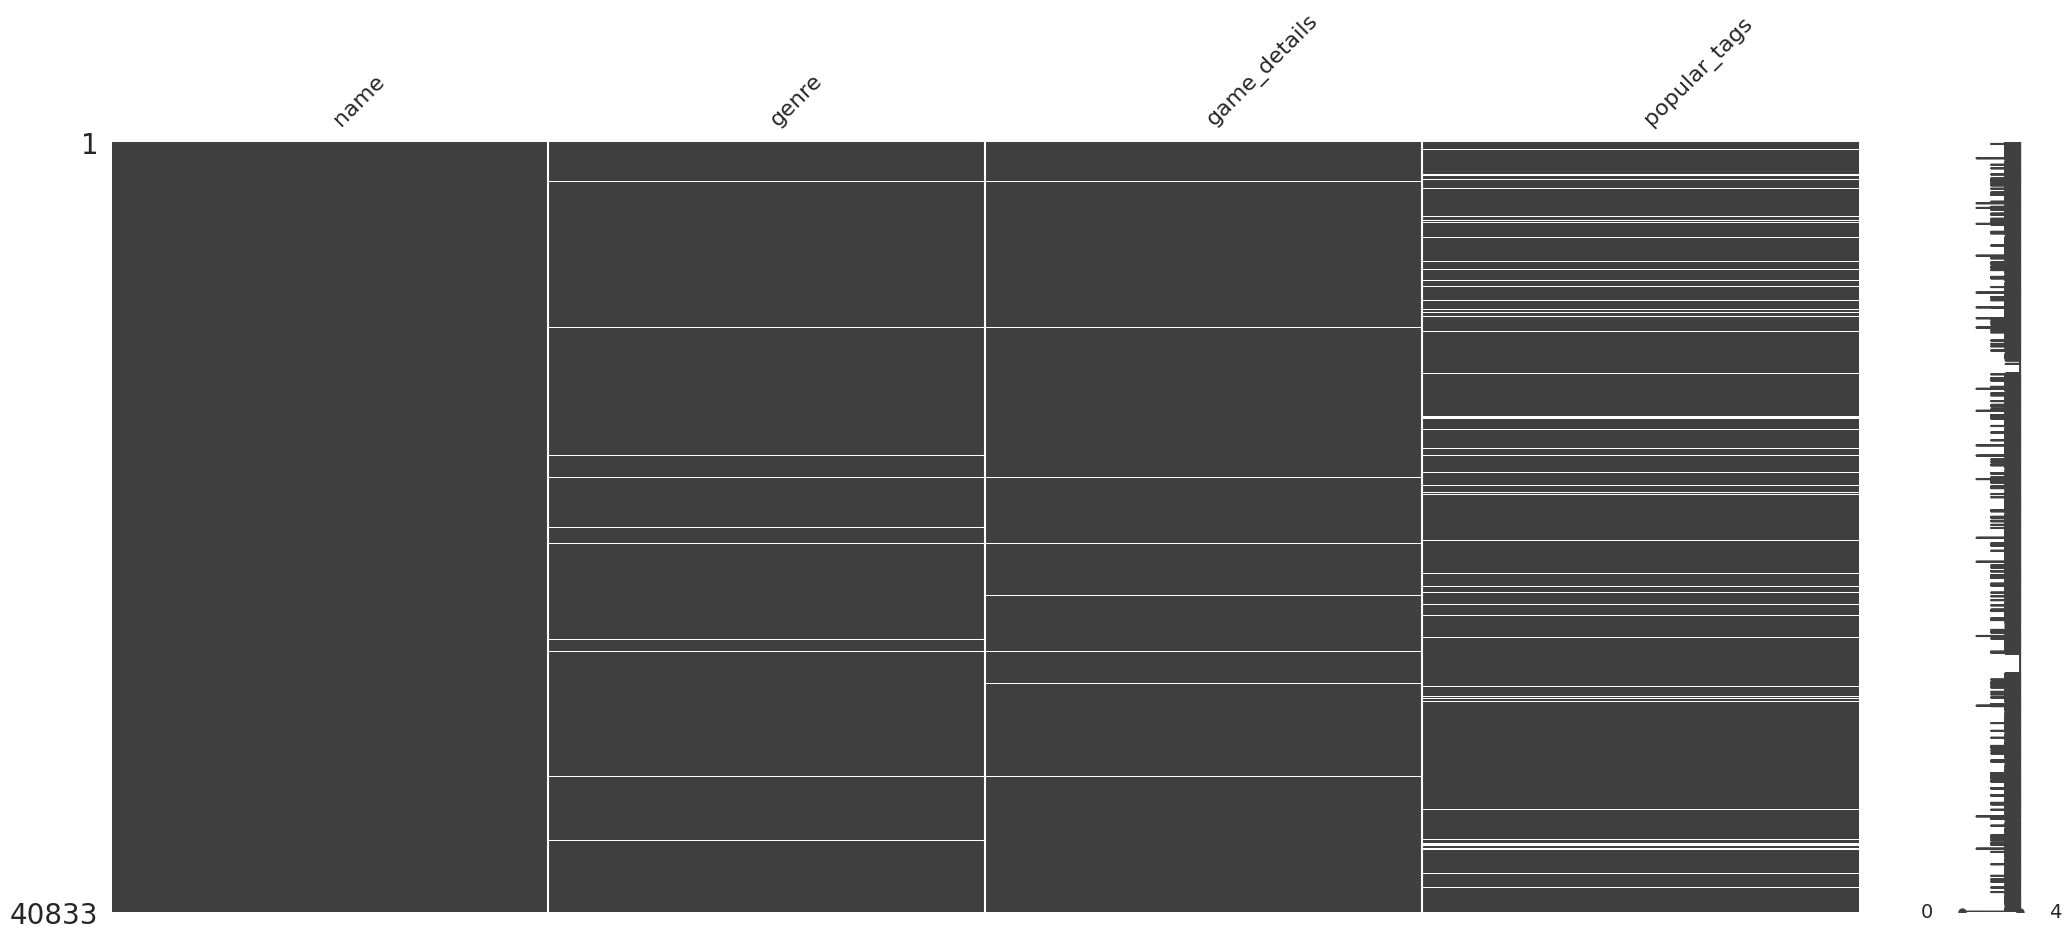

In [31]:
import missingno as msno

# Untuk visualisasi missing values pada dataset;

sorted = select_game.sort_values('name')
msno.matrix(sorted)

plt.savefig('missing_data_matrix.png')
plt.show()

Nilai yang hilang pada data divisualisasikan menggunakan matriks msno.
Karena dapat mengganggu hasil model, maka *missing values* tersebut dihilangkan

In [32]:
select_game = select_game.dropna()

In [33]:
select_game.isnull().sum()

name            0
genre           0
game_details    0
popular_tags    0
dtype: int64

Setelah *missing values* dihilangkan, jumlah *missing values* sudah menjadi 0 untuk setiap kolom

###c. Filter data dari kedua *Dataset*

Diputuskan untuk hanya menyimpan game yang ada di *game dataset* dan *user dataset*. Hal ini dipilih karena ada banyak game dalam dataset game yang belum pernah dimainkan atau dibeli oleh pengguna mana pun dalam dataset pengguna, sehingga tidak ada gunanya mempertimbangkannya dalam sistem rekomendasi. Selain itu, dataset game terlalu besar untuk membuat *matrix cosine similarity* karena membutuhkan terlalu banyak memori.

Untuk mencocokkan *game* dari kedua dataset secara bersamaan, ID untuk setiap *game* dibuat dengan menghapus semua simbol non-alfanumerik dan spasi, dan mengubah semua huruf kapital menjadi huruf kecil dengan menggunakan kode berikut ini, hal yang sama juga dilakukan untuk *game-game* yang ada di *user dataset*.

In [34]:
# Buat kolom ID untuk game dan user dataset
select_game["ID"] = ""
users["ID"] = ""

# hapus spasi dan karakter khusus dari nama game di kedua set data
for i, row in select_game.iterrows():
    clean = re.sub('[^A-Za-z0-9]+', '', row["name"])
    clean = clean.lower()
    select_game.at[i, 'ID'] = clean

for i, row in users.iterrows():
    clean = re.sub('[^A-Za-z0-9]+', '', row["game"])
    clean = clean.lower()
    users.at[i, 'ID'] = clean

In [35]:
select_game.head()

,name,genre,game_details,popular_tags,ID
0,DOOM,Action,"Single-player,Multi-player,Co-op,Steam Achieve...","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",doom
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Action,Adventure,Massively Multiplayer","Multi-player,Online Multi-Player,Stats","Survival,Shooter,Multiplayer,Battle Royale,PvP...",playerunknownsbattlegrounds
2,BATTLETECH,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",battletech
3,DayZ,"Action,Adventure,Massively Multiplayer","Multi-player,Online Multi-Player,Steam Worksho...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",dayz
4,EVE Online,"Action,Free to Play,Massively Multiplayer,RPG,...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...",eveonline


In [36]:
users.head()

,user,game,hrs,purchase,play,ID
0,5250,Alien Swarm,4.9,1,1,alienswarm
1,5250,Cities Skylines,144.0,1,1,citiesskylines
6,5250,Deus Ex Human Revolution,62.0,1,1,deusexhumanrevolution
7,5250,Dota 2,0.2,1,1,dota2
17,5250,Portal 2,13.6,1,1,portal2


Setelah itu, semua ID unik dari *user dataset* digunakan untuk memfilter baris di *game dataset*, dan menampilkan nilai ID yang sama dari kedua dataset

In [37]:
# temukan semua game di game dataset yang cocok dengan game di user dataset
gameArrayUsers = users["ID"].unique()
print(len(gameArrayUsers))
criteriaTest = select_game['ID'].isin(gameArrayUsers)
usedGames = select_game[criteriaTest]
print(len(usedGames))

3598
2297


In [38]:
usedGames

,name,genre,game_details,popular_tags,ID
3,DayZ,"Action,Adventure,Massively Multiplayer","Multi-player,Online Multi-Player,Steam Worksho...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",dayz
4,EVE Online,"Action,Free to Play,Massively Multiplayer,RPG,...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...",eveonline
12,TERA,"Action,Adventure,Free to Play,Massively Multip...","Multi-player,MMO,Co-op,Steam Trading Cards,Par...","Free to Play,MMORPG,Massively Multiplayer,RPG,...",tera
14,Stonehearth,"Indie,Simulation,Strategy","Single-player,Multi-player,Online Multi-Player...","City Builder,Building,Sandbox,Strategy,Surviva...",stonehearth
20,Call of Duty®: Black Ops,Action,"Single-player,Multi-player,Co-op,Steam Achieve...","Action,FPS,Zombies,Multiplayer,Shooter,Singlep...",callofdutyblackops
...,...,...,...,...,...
34491,Particulars,Indie,"Single-player,Steam Achievements,Full controll...","Indie,Puzzle,Physics",particulars
34572,Akuatica,"Action,Adventure,Casual,Indie","Single-player,Steam Achievements,Steam Trading...","Action,Indie,Casual,Adventure,Puzzle",akuatica
39625,The Deer,"Adventure,Indie","Single-player,Steam is learning about this gam...","Gore,Adventure,Violent,Indie,Horror,Hunting,Fi...",thedeer
40711,King-Dom,Strategy,"Online Multi-Player,Steam Achievements,Steam W...","Strategy,Chess,Indie",kingdom


In [39]:
usedGames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 3 to 40778
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          2297 non-null   object
 1   genre         2297 non-null   object
 2   game_details  2297 non-null   object
 3   popular_tags  2297 non-null   object
 4   ID            2297 non-null   object
dtypes: object(5)
memory usage: 107.7+ KB


Hasilnya, diperoleh 2.297 *game* dari *game dataset* yang cocok dengan 3.598 *game* dari *user dataset*.

##5. *Model Development*
###a. *Content Based Filtering*


####- *TF-IDF Vectorizer based on genre*

Fitur penting pada kolom genre diekstrak menggunakan *TF-IDF Vectorizer* menggunakan fungsi *tfidfvectorizer()* dari library sklearn

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(usedGames['genre'])

tf.get_feature_names_out()

array(['access', 'action', 'adventure', 'animation', 'casual', 'design',
       'development', 'early', 'education', 'free', 'game',
       'illustration', 'indie', 'massively', 'modeling', 'multiplayer',
       'play', 'production', 'publishing', 'racing', 'rpg', 'simulation',
       'software', 'sports', 'strategy', 'to', 'training', 'utilities',
       'video', 'web'], dtype=object)

Hasil dari ekstraksi tersebut, dilakukan *fit* dan transformasi kedalam bentuk matriks

In [41]:
tfidf_matrix_genre = tf.fit_transform(usedGames['genre'])

tfidf_matrix_genre.shape

(2297, 30)

In [42]:
tfidf_matrix_genre.todense()

matrix([[0.        , 0.25709935, 0.32392935, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.1823455 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.18316795, 0.23078033, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.79116896, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.2298208 , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi *todense()*

In [43]:
pd.DataFrame(
    tfidf_matrix_genre.todense(),
    columns=tf.get_feature_names_out(),
    index=usedGames.name
).sample(22, axis=1, random_state=42).sample(10, axis=0, random_state=42)

,utilities,multiplayer,sports,production,education,free,video,strategy,indie,access,...,design,massively,illustration,software,action,adventure,to,animation,simulation,training
name,,,,,,,,,,,,,,,,,,,,,
Axiom Verge,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.517948,0.0,...,0.0,0.000000,0.0,0.0,0.531790,0.670022,0.0000,0.0,0.000000,0.0
Adventures of Bertram Fiddle: Episode 1: A Dreadly Business,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.436700,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.564920,0.0000,0.0,0.000000,0.0
GRID 2,0.0,0.000000,0.727551,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0
Collapse,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.621676,0.783274,0.0000,0.0,0.000000,0.0
Planetbase,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.585946,0.418800,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0,0.693739,0.0
Bob Came in Pieces,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.611598,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.791169,0.0000,0.0,0.000000,0.0
Still Life,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0000,0.0,0.000000,0.0
Castlevania: Lords of Shadow – Mirror of Fate HD,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.621676,0.783274,0.0000,0.0,0.000000,0.0
Grand Theft Auto V,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.621676,0.783274,0.0000,0.0,0.000000,0.0


Dari matriks TF-IDF diatas terlihat bahwa *Grand Theft Auto V* termasuk kedalam *genre* *Adventure* dengan nilai 0.7832 dan *Action* dengan nilai 0.6217. Sedangkan, *Planetbase* termasuk kedalam *genre* *simulation* dengan nilai 0.6937, *strategy* dengan nilai 0.5859, dan *Indie* dengan nilai 0.4188

####- Cosine Similiarity based on genre

Derajat kesamaan (*similarity degree*) antar *game based on genre* dihitung dengan teknik *cosine similarity* menggunakan fungsi *cosine_similarity* dari library sklearn.


In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim_genre = cosine_similarity(tfidf_matrix_genre)
cosine_sim_genre

array([[1.        , 0.63482052, 0.71244033, ..., 0.25628285, 0.        ,
        0.05908678],
       [0.63482052, 1.        , 0.94248944, ..., 0.        , 0.24848032,
        0.04190679],
       [0.71244033, 0.94248944, 1.        , ..., 0.18258624, 0.        ,
        0.0420958 ],
       ...,
       [0.25628285, 0.        , 0.18258624, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.24848032, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.05908678, 0.04190679, 0.0420958 , ..., 0.        , 0.        ,
        1.        ]])

In [45]:
cosine_sim_genre_df = pd.DataFrame(cosine_sim_genre, index=usedGames['name'], columns=usedGames['name'])
print('Shape:', cosine_sim_genre_df.shape)

cosine_sim_genre_df.sample(10, axis=1, random_state=42).sample(10, axis=0, random_state=50)

Shape: (2297, 2297)


name,Axiom Verge,Adventures of Bertram Fiddle: Episode 1: A Dreadly Business,GRID 2,Collapse,Planetbase,Bob Came in Pieces,Still Life,Castlevania: Lords of Shadow – Mirror of Fate HD,Grand Theft Auto V,Dream Of Mirror Online
name,,,,,,,,,,
Call of Duty: United Offensive,0.531790,0.000000,0.0,0.621676,0.000000,0.000000,0.000000,0.621676,0.621676,0.000000
Aggression: Europe Under Fire,0.000000,0.000000,0.0,0.000000,0.585946,0.000000,0.000000,0.000000,0.000000,0.000000
Secret Files: Tunguska,0.670022,0.564920,0.0,0.783274,0.000000,0.791169,1.000000,0.783274,0.783274,0.234752
Counter-Strike: Source,0.531790,0.000000,0.0,0.621676,0.000000,0.000000,0.000000,0.621676,0.621676,0.000000
HuniePop,0.181196,0.152773,0.0,0.000000,0.835325,0.213958,0.000000,0.000000,0.000000,0.156778
BattleSpace,0.000000,0.000000,0.0,0.000000,0.154431,0.000000,0.000000,0.000000,0.000000,0.896426
Poly Bridge,0.267683,0.225693,0.0,0.000000,0.810350,0.316082,0.000000,0.000000,0.000000,0.000000
Bleed,0.742341,0.304696,0.0,0.445350,0.292206,0.426725,0.000000,0.445350,0.445350,0.000000
L.A. Noire,0.454866,0.383514,0.0,0.531751,0.430229,0.537111,0.678882,0.531751,0.531751,0.159369


*Matriks cosine similarity* diatas memiliki ukuran 2.297 x 2.297 game. Sebagai contoh ditampilkan 10 *game* pada baris vertikal dan 10 *game* pada baris horizontal.

Dari matriks *Cosine similarity* diatas dapat diketahui bahwa *game Call of Duty: United Offensive* memiliki kesamaan dengan beberapa *game* seperti *Grand Theft Auto V, Castlevania: Lords of Shadow – Mirror of Fate HD,* dan *Collapse* dengan nilai *similarity* yang sama yaitu 0.6216, dan *Axiom Verge* dengan nilai similarity 0.5318

####- Rekomendasi berdasarkan genre

In [46]:
def game_recommendations_genre(game_name, similarity_data=cosine_sim_genre_df, items=usedGames[['name', 'genre']], k=5):

    index = similarity_data.loc[:,game_name].to_numpy().argpartition(
        range(-1, -k, -1))


    closest = similarity_data.columns[index[-1:-(k+2):-1]]


    closest = closest.drop(game_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Setelah *Matriks cosine similarity* dibuat, selanjutnya dibuatkan rekomendasi *game* berdasarkan genre. Sebagai contoh akan dibuatkan rekomendasi untuk game *Portal 2*.

In [47]:
usedGames[usedGames.name.eq('Portal 2')]

,name,genre,game_details,popular_tags,ID
255,Portal 2,"Action,Adventure","Single-player,Co-op,Steam Achievements,Full co...","Puzzle,Co-op,First-Person,Sci-fi,Comedy,Single...",portal2


Game *Portal 2* ini memiliki genre *Action* dan *Adventure*

In [48]:
game_recommendations_genre('Portal 2')


,name,genre
0,Prince of Persia: The Two Thrones™,"Action,Adventure"
1,Saints Row IV,"Action,Adventure"
2,Prototype 2,"Action,Adventure"
3,Tomb Raider II,"Action,Adventure"
4,Batman™: Arkham Origins,"Action,Adventure"


Hasil rekomendasi untuk game *Portal 2* pada tabel di atas memiliki genre yang sama yaitu *Action* dan *Adventure*

####- Rekomendasi berdasarkan *popular tags*

Selain membuat Rekomendasi berdasarkan *genre* dibuatkan juga rekomendari berdasarkan *popular tags*.

In [49]:
tf = TfidfVectorizer()
tf.fit(usedGames['popular_tags'])

tfidf_matrix_tags = tf.fit_transform(usedGames['popular_tags'])

# Menghitung cosine similarity berdasarkan popular tags pada matrix tf-idf
cosine_sim_tags = cosine_similarity(tfidf_matrix_tags)
cosine_sim_tags

cosine_sim_tags_df = pd.DataFrame(cosine_sim_tags, index=usedGames['name'], columns=usedGames['name'])

def game_recommendations_tags(game_name, similarity_data=cosine_sim_tags_df, items=usedGames[['name', 'popular_tags']], k=5):

    index = similarity_data.loc[:,game_name].to_numpy().argpartition(
        range(-1, -k, -1))


    closest = similarity_data.columns[index[-1:-(k+2):-1]]


    closest = closest.drop(game_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [50]:
game_recommendations_tags('Portal 2')

,name,popular_tags
0,Space Farmers,"Indie,Action,Co-op,Space,Multiplayer,Puzzle,On..."
1,Artemis Spaceship Bridge Simulator,"Simulation,Indie,Action,Space,Co-op,Multiplaye..."
2,Borderlands: The Pre-Sequel,"Co-op,FPS,Action,Comedy,Loot,RPG,Open World,Mu..."
3,Serious Sam 2,"Action,FPS,Co-op,Comedy,Multiplayer,Shooter,Fi..."
4,Rocketbirds: Hardboiled Chicken,"Indie,Platformer,Action,Adventure,Great Soundt..."


Hasil rekomendasi untuk game Portal 2 pada tabel di atas memiliki *popular tags* yang sama yaitu *Puzzle,Co-op,First-Person,Sci-fi,Comedy*

####- Rekomendasi berdasarkan *game details*

Selain membuat Rekomendasi berdasarkan *genre* dan *popular tags* dibuatkan juga rekomendari berdasarkan *game details*.

In [51]:
tf = TfidfVectorizer()
tf.fit(usedGames['game_details'])

tfidf_matrix_detail = tf.fit_transform(usedGames['game_details'])

# Menghitung cosine similarity berdasarkan popular tags pada matrix tf-idf
cosine_sim_detail = cosine_similarity(tfidf_matrix_detail)
cosine_sim_detail

cosine_sim_detail_df = pd.DataFrame(cosine_sim_detail, index=usedGames['name'], columns=usedGames['name'])

def game_recommendations_detail(game_name, similarity_data=cosine_sim_detail_df, items=usedGames[['name', 'game_details']], k=5):

    index = similarity_data.loc[:,game_name].to_numpy().argpartition(
        range(-1, -k, -1))


    closest = similarity_data.columns[index[-1:-(k+2):-1]]


    closest = closest.drop(game_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [52]:
game_recommendations_detail('Portal 2')

,name,game_details
0,Apollo4x,"Single-player,Steam Trading Cards,Captions ava..."
1,Amnesia: The Dark Descent,"Single-player,Steam Achievements,Full controll..."
2,Gone Home,"Single-player,Steam Achievements,Full controll..."
3,Just Get Through,"Single-player,Steam Achievements,Full controll..."
4,Hegemony III: Clash of the Ancients,"Single-player,Steam Achievements,Steam Trading..."


Tabel di atas menunjukkan rekomendasi *game* berdasarkan *game details*. Hasil rekomendasi untuk game Portal 2 pada tabel di atas memiliki *game details* yang sama yaitu *Single-player* dan *Steam Achievements*

###b. Collaborative Filtering

####- Data preparation

Sebelum melakukan *Collaborative Filtering*. *User dataset* dan *game dataset* harus dipersiapkan terlebih dahulu.

In [53]:
data = users.copy()
data

,user,game,hrs,purchase,play,ID
0,5250,Alien Swarm,4.9,1,1,alienswarm
1,5250,Cities Skylines,144.0,1,1,citiesskylines
6,5250,Deus Ex Human Revolution,62.0,1,1,deusexhumanrevolution
7,5250,Dota 2,0.2,1,1,dota2
17,5250,Portal 2,13.6,1,1,portal2
...,...,...,...,...,...,...
128797,309434439,Dota 2,0.8,1,1,dota2
128798,309554670,Mitos.is The Game,5.9,1,1,mitosisthegame
128799,309626088,Age of Empires II HD Edition,6.7,1,1,ageofempiresiihdedition
128802,309824202,Dota 2,0.7,1,1,dota2


Pada *User dataset* diatas kolom *purchase, play* dan *ID* tidak digunakan, maka ketiga kolom tersebut akan dihapuskan.

In [54]:
data = data.drop(['purchase', 'play', 'ID'], axis=1)
data

,user,game,hrs
0,5250,Alien Swarm,4.9
1,5250,Cities Skylines,144.0
6,5250,Deus Ex Human Revolution,62.0
7,5250,Dota 2,0.2
17,5250,Portal 2,13.6
...,...,...,...
128797,309434439,Dota 2,0.8
128798,309554670,Mitos.is The Game,5.9
128799,309626088,Age of Empires II HD Edition,6.7
128802,309824202,Dota 2,0.7


Kolom *user dataset* tidak terdapat review atau *Explicit Feedback*. Data yang tersedia adalah Jam bermain, dimana data tersebut merupakan *Implicit Feedback*. Karena perbedaan nilai pada kolom Jam bermain cukup jauh, diputuskan untuk mengitung rata rata jam permainan dan mengkonversikan nilainya menjadi rating dengan nilai (0-5).

In [55]:
data['user'] = data['user'].astype(str)
averages = data.groupby(['game'], as_index=False).hrs.mean()
averages['avg_hrs'] = averages['hrs']
averages.drop('hrs', axis=1, inplace=True)
averages.head(10)

,game,avg_hrs
0,007 Legends,0.700000
1,0RBITALIS,0.400000
2,1... 2... 3... KICK IT! (Drop That Beat Like a...,4.000000
3,10 Second Ninja,2.950000
4,"10,000,000",3.600000
5,100% Orange Juice,8.700000
6,1000 Amps,0.100000
7,12 Labours of Hercules,4.957143
8,12 Labours of Hercules II The Cretan Bull,4.287500
9,12 Labours of Hercules III Girl Power,6.533333


Tabel diatas menunjukkan hasil perhitungan rata - rata Jam permainan

In [56]:
import numpy as np

final_ratings = pd.merge(data,averages[['game','avg_hrs']],on='game')
conditions = [
    (final_ratings['hrs']>=0.8*final_ratings['avg_hrs']),
    (final_ratings['hrs']>=0.6*final_ratings['avg_hrs']) & (final_ratings['hrs']<0.8*final_ratings['avg_hrs']),
    (final_ratings['hrs']>=0.4*final_ratings['avg_hrs']) & (final_ratings['hrs']<0.6*final_ratings['avg_hrs']),
    (final_ratings['hrs']>=0.2*final_ratings['avg_hrs']) & (final_ratings['hrs']<0.4*final_ratings['avg_hrs']),
    final_ratings['hrs']>=0,
]
values = [5,4,3,2,1]
final_ratings['rating'] = np.select(conditions,values)
final_ratings

,user,game,hrs,avg_hrs,rating
0,5250,Alien Swarm,4.9,5.207612,5
1,76767,Alien Swarm,0.8,5.207612,1
2,298950,Alien Swarm,1.6,5.207612,2
3,975449,Alien Swarm,9.8,5.207612,5
4,1364546,Alien Swarm,0.9,5.207612,1
...,...,...,...,...,...
70472,301355977,Terrain Test,0.2,0.200000,5
70473,302328584,Electric Highways,0.3,0.300000,5
70474,302980730,Abducted,0.2,0.200000,5
70475,303789064,Pink Hour,0.4,0.400000,5


Tabel diatas menunjukkan hasil konversi ke jam permainan ke rating

In [57]:
final_ratings = final_ratings.drop(['hrs','avg_hrs'], axis=1)
final_ratings

,user,game,rating
0,5250,Alien Swarm,5
1,76767,Alien Swarm,1
2,298950,Alien Swarm,2
3,975449,Alien Swarm,5
4,1364546,Alien Swarm,1
...,...,...,...
70472,301355977,Terrain Test,5
70473,302328584,Electric Highways,5
70474,302980730,Abducted,5
70475,303789064,Pink Hour,5


Karena, data final_ratings belum memiliki identitas untuk *user* dan *game*. Maka dibuatkan kolom *user_id* dan *game_id*

In [58]:
final_ratings['user_id'] = final_ratings['user'].astype('category').cat.codes
final_ratings['game_id'] = final_ratings['game'].astype('category').cat.codes
final_ratings

,user,game,rating,user_id,game_id
0,5250,Alien Swarm,5,9529,131
1,76767,Alien Swarm,1,10384,131
2,298950,Alien Swarm,2,8487,131
3,975449,Alien Swarm,5,11243,131
4,1364546,Alien Swarm,1,1599,131
...,...,...,...,...,...
70472,301355977,Terrain Test,5,8613,3006
70473,302328584,Electric Highways,5,8649,1027
70474,302980730,Abducted,5,8689,62
70475,303789064,Pink Hour,5,8725,2221


Tabel diatas menunjukkan data *final_ratings* yang telah ditambahkan kolom *user_id* dan *game_id*.

Tahap selanjutnya adalah menambahkan kolom *game_id* ke data *UsedGames* agar terdapat hubungan antara kedua data tersebut

Karena judul kolom nama game di kedua dataset berbeda, menyamakan judul kolom di data *UsedGames*

In [59]:
usedGames = usedGames.rename(columns={'name':'game'})
usedGames

,game,genre,game_details,popular_tags,ID
3,DayZ,"Action,Adventure,Massively Multiplayer","Multi-player,Online Multi-Player,Steam Worksho...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",dayz
4,EVE Online,"Action,Free to Play,Massively Multiplayer,RPG,...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...",eveonline
12,TERA,"Action,Adventure,Free to Play,Massively Multip...","Multi-player,MMO,Co-op,Steam Trading Cards,Par...","Free to Play,MMORPG,Massively Multiplayer,RPG,...",tera
14,Stonehearth,"Indie,Simulation,Strategy","Single-player,Multi-player,Online Multi-Player...","City Builder,Building,Sandbox,Strategy,Surviva...",stonehearth
20,Call of Duty®: Black Ops,Action,"Single-player,Multi-player,Co-op,Steam Achieve...","Action,FPS,Zombies,Multiplayer,Shooter,Singlep...",callofdutyblackops
...,...,...,...,...,...
34491,Particulars,Indie,"Single-player,Steam Achievements,Full controll...","Indie,Puzzle,Physics",particulars
34572,Akuatica,"Action,Adventure,Casual,Indie","Single-player,Steam Achievements,Steam Trading...","Action,Indie,Casual,Adventure,Puzzle",akuatica
39625,The Deer,"Adventure,Indie","Single-player,Steam is learning about this gam...","Gore,Adventure,Violent,Indie,Horror,Hunting,Fi...",thedeer
40711,King-Dom,Strategy,"Online Multi-Player,Steam Achievements,Steam W...","Strategy,Chess,Indie",kingdom


Kolom *game_id* dari data *final_ratings* digabungkan dengan data *usedGames* menggunakan pendekatan *inner join*. Hasil penggabungan keduanya diberi nama data *game*

In [60]:
game = usedGames.merge(final_ratings[['game','game_id']], on='game', how='inner')

In [61]:
game

,game,genre,game_details,popular_tags,ID,game_id
0,DayZ,"Action,Adventure,Massively Multiplayer","Multi-player,Online Multi-Player,Steam Worksho...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",dayz,777
1,DayZ,"Action,Adventure,Massively Multiplayer","Multi-player,Online Multi-Player,Steam Worksho...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",dayz,777
2,DayZ,"Action,Adventure,Massively Multiplayer","Multi-player,Online Multi-Player,Steam Worksho...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",dayz,777
3,DayZ,"Action,Adventure,Massively Multiplayer","Multi-player,Online Multi-Player,Steam Worksho...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",dayz,777
4,DayZ,"Action,Adventure,Massively Multiplayer","Multi-player,Online Multi-Player,Steam Worksho...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",dayz,777
...,...,...,...,...,...,...
35969,GRID,"Action,Casual,Racing,Simulation,Sports","Single-player,Online Multi-Player","Racing,Sports,Simulation,Action,Casual,Arcade",grid,1287
35970,GRID,"Action,Casual,Racing,Simulation,Sports","Single-player,Online Multi-Player","Racing,Sports,Simulation,Action,Casual,Arcade",grid,1287
35971,GRID,"Action,Casual,Racing,Simulation,Sports","Single-player,Online Multi-Player","Racing,Sports,Simulation,Action,Casual,Arcade",grid,1287
35972,GRID,"Action,Casual,Racing,Simulation,Sports","Single-player,Online Multi-Player","Racing,Sports,Simulation,Action,Casual,Arcade",grid,1287


Dibuatkan dataset baru *game_new* yang berisikan *game_id*, *game* dan *genre* dari data *game*

In [62]:
game_ids = game['game_id'].tolist()

game_name = game['game'].tolist()

game_genre = game['genre'].tolist()

In [63]:
game_new = pd.DataFrame({
    'id' : game_ids,
    'game_name' : game_name,
    'genre' : game_genre
})

game_new

,id,game_name,genre
0,777,DayZ,"Action,Adventure,Massively Multiplayer"
1,777,DayZ,"Action,Adventure,Massively Multiplayer"
2,777,DayZ,"Action,Adventure,Massively Multiplayer"
3,777,DayZ,"Action,Adventure,Massively Multiplayer"
4,777,DayZ,"Action,Adventure,Massively Multiplayer"
...,...,...,...
35969,1287,GRID,"Action,Casual,Racing,Simulation,Sports"
35970,1287,GRID,"Action,Casual,Racing,Simulation,Sports"
35971,1287,GRID,"Action,Casual,Racing,Simulation,Sports"
35972,1287,GRID,"Action,Casual,Racing,Simulation,Sports"


Untuk mempermudah penulisan kode, nama data *final_ratings* diubah menjadi df

In [64]:
df = final_ratings

Melakukan proses encoding fitur *user_id* dan *game_id* ke dalam indeks integer

In [65]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [9529, 10384, 8487, 11243, 1599, 4672, 5554, 6138, 7733, 9041, 9109, 9323, 10464, 10730, 10954, 11270, 64, 201, 210, 512, 612, 624, 763, 788, 793, 854, 1047, 1139, 1320, 1561, 1851, 1970, 1996, 2037, 2099, 2198, 2227, 2331, 2592, 3304, 3518, 3561, 3594, 3816, 3830, 4446, 4773, 5079, 5173, 5227, 5412, 5530, 5938, 6048, 6511, 6602, 6951, 7309, 7550, 7596, 7600, 7679, 7692, 7737, 7848, 8132, 8188, 8207, 8524, 8761, 8784, 8907, 8928, 8938, 8940, 8971, 8978, 8990, 8991, 8995, 9003, 9015, 9024, 9029, 9031, 9058, 9068, 9071, 9073, 9104, 9112, 9156, 9164, 9177, 9210, 9246, 9249, 9269, 9286, 9289, 9290, 9316, 9325, 9332, 9342, 9371, 9376, 9382, 9386, 9389, 9409, 9413, 9419, 9431, 9433, 9440, 9454, 9463, 9469, 9487, 9489, 9498, 9504, 9509, 9537, 9547, 9560, 9562, 9563, 9575, 9589, 9592, 9615, 9636, 9660, 9683, 9700, 9727, 9752, 9771, 9775, 9784, 9797, 9803, 9815, 9816, 9823, 9834, 9855, 9856, 9866, 9888, 9892, 9898, 9905, 9926, 9929, 9932, 9936, 9937, 9945, 9975, 9979, 9981, 9985,

In [66]:
# Mengubah game_id menjadi list tanpa nilai yang sama
game_ids = df['game_id'].unique().tolist()

# Melakukan proses encoding game_id
game_to_game_encoded = {x: i for i, x in enumerate(game_ids)}

# Melakukan proses encoding angka ke game_id
game_encoded_to_game = {i: x for i, x in enumerate(game_ids)}

Selanjutnya memetkan *user_id* dan *game_id* ke *data frame* yang berkaitan

In [67]:
# Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping game_id ke dataframe game
df['game'] = df['game_id'].map(game_to_game_encoded)

Melakukan pengecekan jumlah *user*, jumlah *game*, dan mengubah nilai rating menjadi *float*

In [68]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah game
num_game = len(game_encoded_to_game)
print(num_game)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Game: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_game, min_rating, max_rating
))

11350
3600
Number of User: 11350, Number of Game: 3600, Min Rating: 1.0, Max Rating: 5.0


####- Membagi data Training dan Validasi

Sebelum membagi data, acak data terlebih dahulu agar distribusinya menjadi *random*



In [69]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user,game,rating,user_id,game_id
24277,405,124,2.0,9567,1907
31744,1317,203,1.0,1440,485
35649,118,293,4.0,9469,1043
51503,7434,765,4.0,1215,1829
44559,810,541,2.0,11251,878
...,...,...,...,...,...
37194,350,335,1.0,1546,2375
6265,5464,5,1.0,10242,2994
54886,21,912,1.0,624,1049
860,672,3,2.0,10293,922


Data train dan validasi dibagi dengan komposisi 80:20.

Namun sebelumnya, perlu dilakukan pememetaan *(mapping)* data user dan game agar menjadi satu value terlebih dahulu. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [70]:
# Membuat variabel x untuk mencocokkan data user dan game menjadi satu value
x = df[['user', 'game']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 405  124]
 [1317  203]
 [ 118  293]
 ...
 [  21  912]
 [ 672    3]
 [  23   36]] [0.25 0.   0.75 ... 0.   0.25 0.5 ]


####- Training Model

Pada tahap ini, model menghitung skor kecocokan antara pengguna dan *game* dengan teknik *embedding*. Pertama, dilakukan proses *embedding* terhadap data user dan resto. Selanjutnya, melakukan operasi perkalian *dot product* antara *embedding* *user* dan *game*. Selain itu, ditambahkan bias untuk setiap *user* dan *game*. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi *sigmoid*.

Dibuatkan *class RecommenderNet* dengan *keras Model class*. Kode *class RecommenderNet* ini terinspirasi dari tutorial dalam situs Keras dengan beberapa adaptasi sesuai kasus yang sedang diselesaikan.

In [71]:
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_game, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_game = num_game
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.game_embedding = layers.Embedding( # layer embeddings game
        num_game,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.game_bias = layers.Embedding(num_game, 1) # layer embedding game bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    game_vector = self.game_embedding(inputs[:, 1]) # memanggil layer embedding 3
    game_bias = self.game_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_game = tf.tensordot(user_vector, game_vector, 2)

    x = dot_user_game + user_bias + game_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, melakukan proses compile terhadap model.

In [72]:
model = RecommenderNet(num_users, num_game, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan *Binary Crossentropy* untuk menghitung *loss function*, *Adam (Adaptive Moment Estimation)* sebagai *optimizer*, dan *root mean squared error (RMSE)* sebagai *metrics evaluation*.

Langkah berikutnya, adalah memulai proses training.

In [73]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 30,
    validation_data = (x_val, y_val)
)

Epoch 1/30
1762/1762 [==============================] - 22s 12ms/step - loss: 0.6759 - root_mean_squared_error: 0.4305 - val_loss: 0.6645 - val_root_mean_squared_error: 0.4241
Epoch 2/30
1762/1762 [==============================] - 18s 10ms/step - loss: 0.6548 - root_mean_squared_error: 0.4183 - val_loss: 0.6578 - val_root_mean_squared_error: 0.4200
Epoch 3/30
1762/1762 [==============================] - 22s 12ms/step - loss: 0.6445 - root_mean_squared_error: 0.4123 - val_loss: 0.6518 - val_root_mean_squared_error: 0.4164
Epoch 4/30
1762/1762 [==============================] - 19s 11ms/step - loss: 0.6366 - root_mean_squared_error: 0.4077 - val_loss: 0.6498 - val_root_mean_squared_error: 0.4151
Epoch 5/30
1762/1762 [==============================] - 21s 12ms/step - loss: 0.6316 - root_mean_squared_error: 0.4047 - val_loss: 0.6467 - val_root_mean_squared_error: 0.4132
Epoch 6/30
1762/1762 [==============================] - 19s 11ms/step - loss: 0.6257 - root_mean_squared_error: 0.4015 -

###- Visualisasi Metrik

Untuk melihat visualisasi proses training, dilakukan plot metrik evaluasi dengan matplotlib.

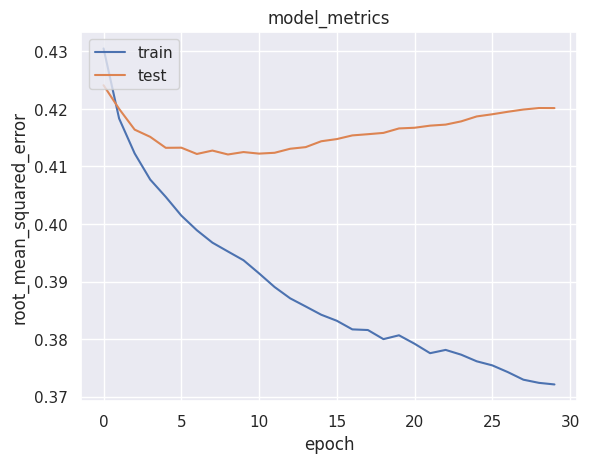

In [74]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.savefig('Model_metrics.png')
plt.show()

proses training model cukup smooth pada iterasi ke 30 belum terlihat bahwa model konvergen.Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.3721 dan error pada data validasi sebesar 0.6663. Nilai tersebut cukup bagus untuk sistem rekomendasi.

####- Mendapatkan Rekomendasi Game

Untuk mendapatkan rekomendasi game, pertama ambil sampel *user* secara acak dan definisikan variabel *game_not_played* yang merupakan daftar *game* yang belum pernah dimainkan oleh pengguna. Tujuan variabel *game_not_played* ini ditentukan, karena daftar *game_not_played* inilah yang akan menjadi *game* yang akan direkomendasikan.

Sebelumnya, pada data *user* dapat diketahui *game* apa saja yang telah dimainkan oleh pengguna beserta dengan jumlah Jam bermainnya. Jumlah jam bermain yang kemudian dikonversi menjadi rating digunakan untuk membuat rekomendasi *game* yang mungkin cocok untuk pengguna. *Game* yang akan direkomendasikan tentulah *game* yang belum pernah dimainkan oleh pengguna. Oleh karena itu, perlu dibuatkan variabel *game_not_played* sebagai daftar *game* untuk direkomendasikan pada pengguna.

Variabel *game_not_played* diperoleh dengan menggunakan operator bitwise (~) pada variabel *game_played_by_user*.

In [75]:
game_df = game_new
df = final_ratings

# Mengambil sample user
user_ids = df.user_id.sample(1).iloc[0]
game_played_by_user = df[df.user_id == user_ids]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
game_not_played = game_df[~game_df['id'].isin(game_played_by_user.game_id.values)]['id']
game_not_played = list(
    set(game_not_played)
    .intersection(set(game_to_game_encoded.keys()))
)

game_not_played = [[game_to_game_encoded.get(x)] for x in game_not_played]
user_encoder = user_to_user_encoded.get(user_ids)
user_game_array = np.hstack(
    ([[user_encoder]] * len(game_not_played), game_not_played)
)

In [76]:
ratings = model.predict(user_game_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_game_ids = [
    game_encoded_to_game.get(game_not_played[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_ids))
print('===' * 9)
print('Game with high playing hours from user')
print('----' * 8)

top_game_user = (
    game_played_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .game_id.values
)

game_df_rows = game_df[game_df['id'].isin(top_game_user)].drop_duplicates(subset=['game_name'])
for row in game_df_rows.itertuples():
    print(row.game_name, ':', row.genre)

print('----' * 8)
print('Top 10 game recommendation')
print('----' * 8)

recommended_game = game_df[game_df['id'].isin(recommended_game_ids)].drop_duplicates(subset=['game_name'])
for row in recommended_game.itertuples():
    print(row.game_name, ':', row.genre)

47/47 [==============================] - 0s 2ms/step
Showing recommendations for users: 7338
Game with high playing hours from user
--------------------------------
Dota 2 : Action,Free to Play,Strategy
--------------------------------
Top 10 game recommendation
--------------------------------
Layers of Fear : Adventure,Indie
140 : Action,Indie
Pyramid Raid : Action,Casual,Indie
Dwarfs!? : Strategy,Indie,Casual
Saira : Indie
Platypus II : Action
Rustbucket Rumble : Action,Casual,Free to Play,Indie
HIT : Free to Play
Hacker Evolution Duality : Indie
Game Tycoon 1.5 : Simulation,Strategy


##6. *Evaluation*

###- Content Based Filtering - based on Genre

Untuk mengukur seberapa baik model, digunakan metrik evaluasi. Adapun metrik yang sebagai alat ukur perfoma model yang dibuat antara lain ***Precission***

- Presisi adalah metrik yang digunakan untuk mengevaluasi kinerja model pengelompokan. Metrik ini menghitung rasio prediksi positif sejati terhadap jumlah total prediksi positif (positif sejati dan positif palsu).

Rumus dari presisi adaalah sebagai berikut:

$$ Precision = \dfrac {TP}  {(TP + FP)} $$

dimana
- TP (True Positives) adalah jumlah kejadian positif yang diprediksi dengan benar.
- FP (False Positif) adalah jumlah kejadian positif yang diprediksi salah.

Adapun interpretasi hasil presisi berdasarkan Tabel 15, 16, dan 17 dapat dilihat bahwasanya besar presisi jika dihitung dengan menggunakan rumusan presisi adalah 5/5 atau 100% untuk model rekomendasi Top-5. Hal ini menunjukkan bahwa model mampu memberikan rekomendasi dengan tingkat presisi yang sangat baik (dalam hal ini 100%). Hal ini sesuai dengan hasil uji dimana model mampu memberikan rekomendasi dengan *Genre*, *Popular Tags*, dan *Game Details* yang yang mirip dengan game "Portal 2" yaitu dengan Genres: Education, Type: Free dan Content Rating: Everyone. Hasil rekomendasi menampilkan 5 buah *game* dengan Genres: *Action* dan *Adventure*, Popular Tags: *Puzzle,Co-op,First-Person,Sci-fi,Comedy* dan Game details: *Single-player dan Steam Achievements* yang serupa dengan "Portal 2".






####- Collaborative Filtering

Metrics yang digunakan untuk mengevaluasi kinerja dari *Collaborative Filtering* ini adalah *RMSE (Root-Mean Squared Error)*.

*Root mean square error* atau *root mean square deviation* salah satu ukuran yang paling umum digunakan untuk mengevaluasi kualitas prediksi. Ukuran ini menunjukkan seberapa jauh prediksi jatuh dari nilai sebenarnya yang diukur menggunakan jarak *Euclidean*.

Untuk menghitung RMSE, hitung residual (perbedaan antara prediksi dan kebenaran) untuk setiap titik data, hitung norma residual untuk setiap titik data, hitung rata-rata residual, dan ambil akar kuadrat dari rata-rata tersebut. RMSE biasanya digunakan dalam aplikasi *supervised learning*, karena RMSE menggunakan dan membutuhkan pengukuran yang sebenarnya pada setiap titik data yang diprediksi.

Root mean square error dapat dihitung dengan persamaan berikut:

$$RMSE = \sqrt {\frac{\sum_{i=1}^{N} || y(i) - \hat{y}(i) ||^2}{N}}$$

di mana N adalah jumlah titik data, y(i) adalah pengukuran ke-i, dan y ̂(i) adalah prediksi yang sesuai.

In [77]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_val)

print("RMSE =", mean_squared_error(y_val, y_pred, squared=False))


441/441 [==============================] - 1s 2ms/step
RMSE = 0.4201374725049475


Nilai RMSE dari model jika dibandingkan dengan data validasi adalah 0.42014. Nilai RMSE cukup rendah, hal ini menunjukkan bahwa model memiliki akurasi yang cukup baik dalam memberikan rekomendasi dengan pendekatan *Collaborative Filtering*